In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_personal_example import transaction_data_file, block_data_file,  \
large_pre_gas_prices_file, suite_spot_txn, suite_spot_blx, new_post_eip_txn, \
new_post_eip_blx, new_post_eip_rcpts, post_eip_oct_txn_file, post_eip_oct_blx_file


#post eip day 1
post_eip_d1_txn=pd.read_csv(transaction_data_file)
post_eip_d1_blx=pd.read_csv(block_data_file)

#post eip late october
post_eip_oct_txn=pd.read_csv(post_eip_oct_txn_file)
post_eip_oct_blx=pd.read_csv(post_eip_oct_blx_file)


#pre eip gas prices
large_pre_gas_prices=list(pd.read_csv(large_pre_gas_prices_file).gas_price)

#get rid of nulls
post_txns=post_eip_d1_txn[pd.notnull(post_eip_d1_txn.max_priority_fee_per_gas)]



#functions
def sumthing(larger_list,smaller_list):
    return sum(smaller_list)/sum(larger_list)

def random_index_generator(my_list,num_of_indexes):
    my_max=len(my_list)-1
    result=np.random.uniform(0,my_max,num_of_indexes)
    return [round(x) for x in result]

THE FIRST CHUNK IS FROM THE FIRST DAY OF EIP 1559

Gas price post-EIP; found to simply be the gas price in the post-EIP dataset.

Regular: 

post gas variance =2.1845747942535863e+20, pre gas variance=1.9615166237827722e+21

 

rescaled: 

post gas variance =2.1845747942535863e+20, rescaled pre gas variance=1.4995806240648856e+20


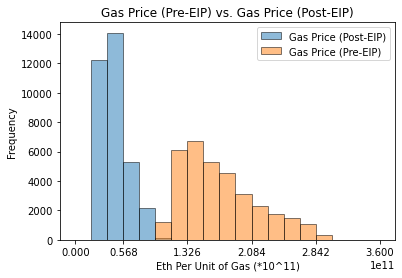

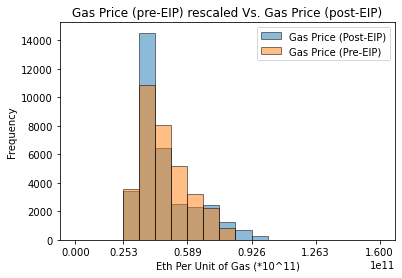

In [2]:
post_eip_gas_price=list(post_txns.gas_price)


post_up=np.percentile(post_eip_gas_price,95)
post_lo=np.percentile(post_eip_gas_price,10)
post_eip_gas_price=[x for x in post_eip_gas_price if (x < post_up) & (x > post_lo)]


my_up=np.percentile(large_pre_gas_prices,95)
my_lo=np.percentile(large_pre_gas_prices,10)
my_pre_gas=[x for x in large_pre_gas_prices if (x < my_up) & (x > my_lo)]



my_index=random_index_generator(my_pre_gas,33910)
my_pre_gas=[my_pre_gas[x] for x in my_index]




fig = plt.figure()
ax = plt.axes()

my_bins=np.linspace(0, 360000000000,20)
x_ticks=[my_bins[0],round(my_bins[3]),\
round(my_bins[7]),round(my_bins[11]),round(my_bins[15]),my_bins[19]]

plt.hist(post_eip_gas_price,bins=my_bins,alpha=0.5,label='Gas Price (Post-EIP)',ec='black')
plt.hist(my_pre_gas,bins=my_bins,alpha=0.5,label='Gas Price (Pre-EIP)',ec='black')
ax.set_title('Gas Price (Pre-EIP) vs. Gas Price (Post-EIP)')
ax.set_xlabel('Eth Per Unit of Gas (*10^11)')
ax.set_ylabel('Frequency')
plt.xticks(x_ticks)
plt.legend()
#plt.savefig('Gas_Price_(Pre-EIP)_vs._Gas_Price_(Post-EIP).png')

print('Regular: \n')
print('post gas variance =' + str(np.var(post_eip_gas_price)) + \
      ', pre gas variance=' + str(np.var(my_pre_gas)))


fig2 = plt.figure()
ax2 = plt.axes()


rescale_ratio=sumthing(my_pre_gas,post_eip_gas_price)
rescaled_pre_eip_gas_price=[x * rescale_ratio for x in my_pre_gas]


my_bins=np.linspace(0, 160000000000,20)
x_ticks=[my_bins[0],round(my_bins[3]),\
round(my_bins[7]),round(my_bins[11]),round(my_bins[15]),my_bins[19]]

plt.hist(post_eip_gas_price,bins=my_bins,alpha=0.5, \
         label='Gas Price (Post-EIP)',ec='black')
plt.hist(rescaled_pre_eip_gas_price,bins=my_bins,alpha=0.5, \
         label='Gas Price (Pre-EIP)',ec='black')
ax2.set_title('Gas Price (pre-EIP) rescaled Vs. Gas Price (post-EIP)')
ax2.set_xlabel('Eth Per Unit of Gas (*10^11)')
ax2.set_ylabel('Frequency')
plt.xticks(x_ticks)
plt.legend();
#plt.savefig('Gas_Price_(pre-EIP)_rescaled_Vs._Gas_Price_(post-EIP).png')


print('\n \n')
print('rescaled: \n')
print('post gas variance =' + str(np.var(post_eip_gas_price)) + \
      ', rescaled pre gas variance=' + str(np.var(rescaled_pre_eip_gas_price)))

NOW FOR LATE OCTOBER DATA

Regular: 

post gas variance (oct)=8.085690197885333e+20, pre gas variance =1.9659273863200938e+21

 

rescaled: 

post gas variance (oct)=8.085690197885333e+20, rescaled pre gas variance=1.0395832271898011e+21


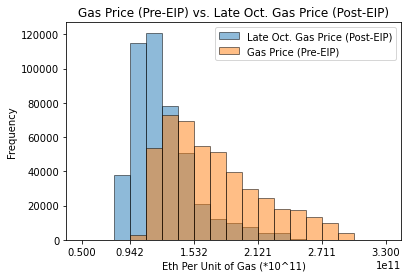

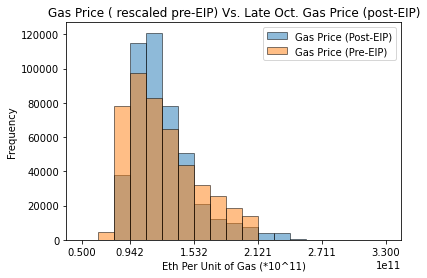

In [3]:
#df[pd.notnull(df.column_of_interest)]

post_eip_oct_txn=post_eip_oct_txn[pd.notnull(post_eip_oct_txn.max_priority_fee_per_gas)]

#display(post_eip_oct_txn)

post_oct_gas_price=list(post_eip_oct_txn.gas_price)

oct_up=np.percentile(post_oct_gas_price,95)
oct_lo=np.percentile(post_oct_gas_price,10)
post_oct_gas_price=[x for x in post_oct_gas_price if (x < oct_up) & (x > oct_lo)]




my_up=np.percentile(large_pre_gas_prices,95)
my_lo=np.percentile(large_pre_gas_prices,10)
my_pre_gas=[x for x in large_pre_gas_prices if (x < my_up) & (x > my_lo)]



my_index=random_index_generator(my_pre_gas,461162)
my_pre_gas=[my_pre_gas[x] for x in my_index]





fig = plt.figure()
ax = plt.axes()

my_bins=np.linspace(50000000000, 330000000000,20)
x_ticks=[my_bins[0],round(my_bins[3]),\
round(my_bins[7]),round(my_bins[11]),round(my_bins[15]),my_bins[19]]

plt.hist(post_oct_gas_price,bins=my_bins,alpha=0.5, \
         label='Late Oct. Gas Price (Post-EIP)',ec='black')
plt.hist(my_pre_gas,alpha=0.5,bins=my_bins,label='Gas Price (Pre-EIP)',ec='black')


ax.set_title('Gas Price (Pre-EIP) vs. Late Oct. Gas Price (Post-EIP)')
ax.set_xlabel('Eth Per Unit of Gas (*10^11)')
ax.set_ylabel('Frequency')
plt.xticks(x_ticks)
plt.legend()
#plt.savefig('Gas_Price_(Pre-EIP)_vs._Late_Oct._Gas_Price_(Post-EIP).png')

print('Regular: \n')
print('post gas variance (oct)=' + str(np.var(post_oct_gas_price)) + \
      ', pre gas variance =' + str(np.var(my_pre_gas)))

rescale_ratio=sumthing(my_pre_gas,post_oct_gas_price)
rescaled_pre_eip_gas_price=[x * rescale_ratio for x in my_pre_gas]


fig2 = plt.figure()
ax2 = plt.axes()

my_bins=np.linspace(50000000000, 330000000000,20)
x_ticks=[my_bins[0],round(my_bins[3]),\
round(my_bins[7]),round(my_bins[11]),round(my_bins[15]),my_bins[19]]

plt.hist(post_oct_gas_price,bins=my_bins,alpha=0.5, \
         label='Gas Price (Post-EIP)',ec='black')
plt.hist(rescaled_pre_eip_gas_price,bins=my_bins,alpha=0.5, \
         label='Gas Price (Pre-EIP)',ec='black')
ax2.set_title('Gas Price ( rescaled pre-EIP) Vs. Late Oct. Gas Price (post-EIP)')
ax2.set_xlabel('Eth Per Unit of Gas (*10^11)')
ax2.set_ylabel('Frequency')
plt.xticks(x_ticks)
plt.legend();
plt.savefig('Gas_Price _(rescaled_pre-EIP)_Vs._Gas Price_(post-EIP).png')


print('\n \n')
print('rescaled: \n')
print('post gas variance (oct)=' + str(np.var(post_oct_gas_price)) + \
      ', rescaled pre gas variance=' + str(np.var(rescaled_pre_eip_gas_price)))
#this